In [1]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
from scipy.interpolate import interp1d
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.misc
from scipy.fft import fft, fftfreq


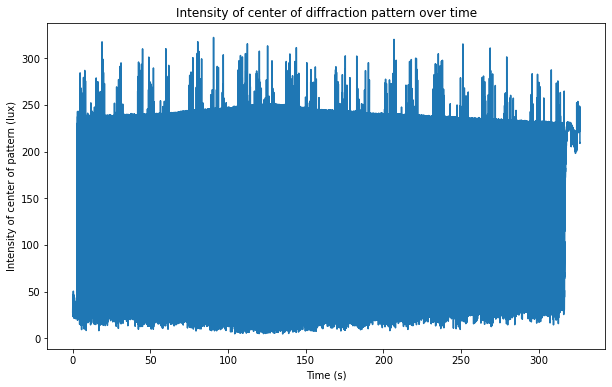

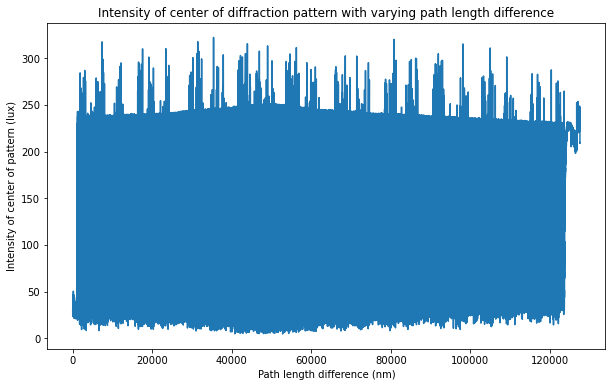

In [17]:
'''We will have intensity data I and time data t from logger pro
We will need to calculate path length change data ds using angular velocity (or similar) of servo motor'''

#data

raw_data_array = pd.read_csv('laser 7.csv')
raw_data = pd.DataFrame(raw_data_array).to_numpy()
I = raw_data[:,1]
t = raw_data[:,0]
w = (2*np.pi)/128
ds = 1000 * ((50/(2*np.pi))*w*t)    #for angular velocity w in radians. rotations are in µm so 1000 factor converts to nm

#graph data pre transformation

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(t,I)
plt.ylabel("Intensity of center of pattern (lux)")
plt.xlabel("Time (s)")
plt.title("Intensity of center of diffraction pattern over time")
plt.show()

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(ds,I)
plt.ylabel("Intensity of center of pattern (lux)")
plt.xlabel("Path length difference (nm)")
plt.title("Intensity of center of diffraction pattern with varying path length difference")
plt.show()

2.56


<ipython-input-18-685e79c9dad9>:10: RuntimeWarning: divide by zero encountered in true_divide
  xfwavelength = 2*np.pi/xffreq


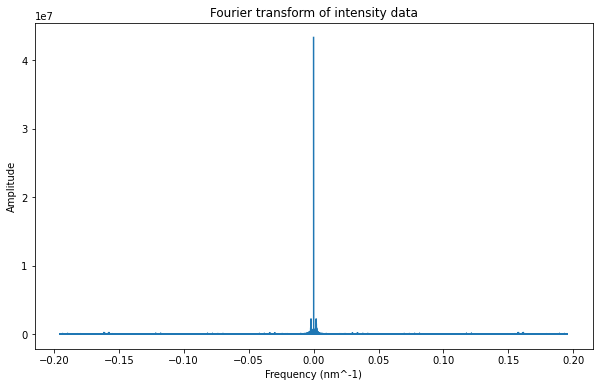

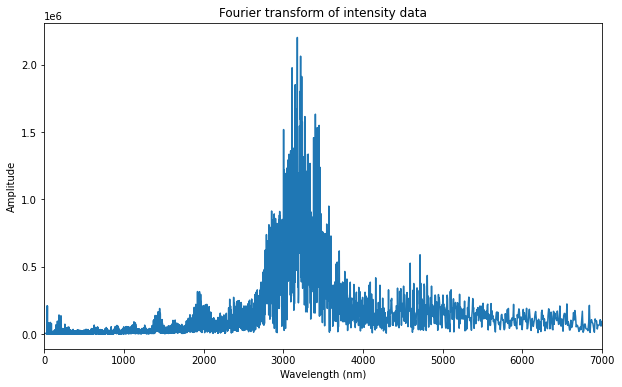

In [18]:
##### Fourier transform

n = len(I)
srate = 1/ (1000*((50/(2*np.pi)*w*(1/1000))))   #sample rate in 1/nm. from 1000 Hz sample rate
print(srate)

yf = fft(I)
xffreq = fftfreq(n, srate) 
xfwavelength = np.zeros(len(xffreq))
xfwavelength = 2*np.pi/xffreq

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(xffreq, abs(yf))
plt.xlim()
plt.ylabel("Amplitude")
plt.xlabel("Frequency (nm^-1)")
plt.title("Fourier transform of intensity data")
plt.show()

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(xfwavelength, abs(yf))
plt.xlim(0,7000)
plt.ylabel("Amplitude")
plt.xlabel("Wavelength (nm)")
plt.title("Fourier transform of intensity data")
plt.show()